# Internet Advertisements Data Set

## Data Set Information:

This dataset represents a set of possible advertisements on Internet pages. The features encode the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. The task is to predict whether an image is an advertisement ("ad") or not ("nonad"). Additional information can be found [here](https://archive.ics.uci.edu/ml/datasets/internet%2Badvertisements).

## Attribute Information:

The dataset has 3 continous (height, width, aratio) and 1555 binary (urls, tags, captions) features. 

## Source:

Creator & donor: Nicholas Kushmerick <nick '@' ucd.ie>

# Learning Objectives
- Identify and impute missing data
- Use normalization as part of the modeling process: min max normalization.
- Use normalization as part of the modeling process: centering and scaling.
- Use hold-out validation to compare the performance of a pair of models using a large data set.

In [1]:
import pandas as pd
import numpy as np

# Load the data
internetAd = pd.read_csv('Internet_Ad_Data.csv', sep=',', error_bad_lines=False)
print(internetAd.info())
internetAd.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, height to Target
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


Question 1.1: Replace all the values of '   ?' with nan. And replace ad. with 1 and nonad. with 0

In [2]:
import numpy as np
internetAd = internetAd.replace(to_replace='\?', value=np.nan, regex=True)
internetAd['Target'] = internetAd['Target'].replace('ad.', 1).replace('nonad.', 0)

Question 1.1 Part 2: Check that replacing worked

In [3]:
internetAd.head(12)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Make Sure that "height","width","aratio" is type - float

In [4]:
float_columns = ['height', 'width', 'aratio', 'local']
internetAd[float_columns] = internetAd[float_columns].astype(float)
internetAd.head(10)

,height,width,aratio,local,url*images+buttons,url*likesbooks.com,url*www.slake.com,url*hydrogeologist,url*oso,url*media,...,caption*home,caption*my,caption*your,caption*in,caption*bytes,caption*here,caption*click,caption*for,caption*you,Target
0,125.0,125.0,1.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,57.0,468.0,8.2105,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33.0,230.0,6.9696,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,59.0,460.0,7.7966,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,60.0,234.0,3.9000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Question 1.2: Describe the statistics for each of the columns ["height","width","aratio","local"] 

In [5]:
for col in float_columns:
    print(internetAd[col].name)
    print(internetAd[col].describe())
    print()

height
count    2376.000000
mean       64.021886
std        54.868604
min         1.000000
25%        25.000000
50%        51.000000
75%        85.250000
max       640.000000
Name: height, dtype: float64

width
count    2378.000000
mean      155.344828
std       130.032350
min         1.000000
25%        80.000000
50%       110.000000
75%       184.000000
max       640.000000
Name: width, dtype: float64

aratio
count    2369.000000
mean        3.911953
std         6.042986
min         0.001500
25%         1.035700
50%         2.102000
75%         5.333300
max        60.000000
Name: aratio, dtype: float64

local
count    3264.000000
mean        0.767157
std         0.422708
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: local, dtype: float64



Question 2.1: Caluclate and display the (mean, median, mode) for each of the columns ["height","width","aratio","local"] as well as the overall statistics using describe method.

In [6]:
#Mean
for col in float_columns:
    print(internetAd[col].name)
    print(internetAd[col].mean())
    print()

height
64.02188552188552

width
155.3448275862069

aratio
3.9119525116082734

local
0.7671568627450981



In [7]:
#Median
for col in float_columns:
    print(internetAd[col].name)
    print(internetAd[col].median())
    print()

height
51.0

width
110.0

aratio
2.102

local
1.0



In [8]:
#Mode
for col in float_columns:
    print(internetAd[col].name)
    print(internetAd[col].mode())
    print()

height
0    60.0
dtype: float64

width
0    468.0
dtype: float64

aratio
0    1.0
dtype: float64

local
0    1.0
dtype: float64



Question 2.2: Replace nan values for each of the ["height","width","aratio","local"] with the respective median value

In [9]:
internetAd[float_columns] = internetAd[float_columns].fillna(internetAd[float_columns].median())

Question 3.1: Plot the distribution of each of ["height","width","aratio","local"]

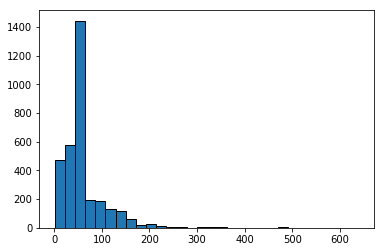

In [11]:
from matplotlib import pyplot as plt

plt1 = plt.hist(internetAd.height, bins=30, edgecolor='black')
plt.show()

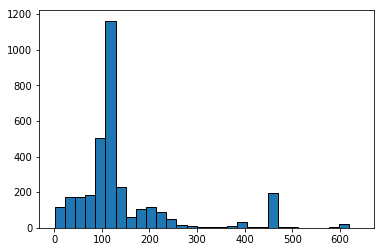

In [12]:
plt2 = plt.hist(internetAd.width, bins=30, edgecolor='black')
plt.show()

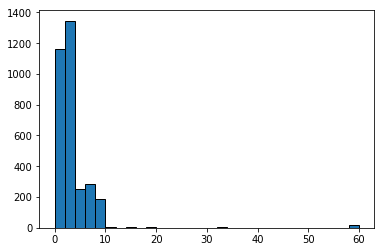

In [13]:
plt3 = plt.hist(internetAd.aratio, bins=30, edgecolor='black')
plt.show()

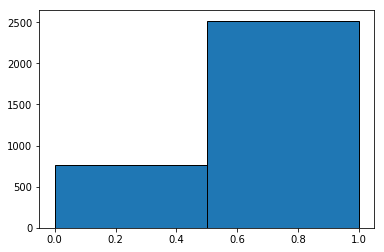

In [14]:
plt4 = plt.hist(internetAd.local, bins=2, edgecolor='black')
plt.show()

Question 3.2: You have noticed the wide variation across the different features. As a result, let's normalize the features using [MinMaxScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) method. Before we do that, we need to split the data into training and testing.

In [15]:
from sklearn.model_selection import train_test_split

X = internetAd.drop('Target', axis=1)
y = internetAd['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

It's not appropriate to scale binary features, so I will make use of the ColumnTransformer method to scale only certain features, without scaling others. 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['height', 'width', 'aratio']
mm_scaler = ColumnTransformer(
    [('mm_scaler', MinMaxScaler(), numeric_features)
    ], remainder='passthrough')
mm_scaler.fit(X_train)
X_train_minmax_scaled = mm_scaler.transform(X_train)
X_test_minmax_scaled = mm_scaler.transform(X_test) 

Question 3.3: Lets build another training set where features are normalized using [StandardScalar](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [17]:
from sklearn.preprocessing import StandardScaler

std_scaler = ColumnTransformer(
    [('std_scaler', StandardScaler(), numeric_features)
    ], remainder='passthrough')

std_scaler.fit(X_train) # fit 
X_train_standard_scaled = std_scaler.transform(X_train)
X_test_standard_scaled = std_scaler.transform(X_test)

Question 4.1: Apply [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to the above minmax scaled dataset with class_weight='balanced', solver='saga', and max_iter=1000. Calculate Accuracy, Confusion Matrix, Precision, and Recall.


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def model_and_report(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(classification_report(y_test, y_predict))
    print(confusion_matrix(y_test, y_predict))

clf = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_minmax_scaled, X_test_minmax_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       916
           1       0.89      0.90      0.90       167

    accuracy                           0.97      1083
   macro avg       0.94      0.94      0.94      1083
weighted avg       0.97      0.97      0.97      1083

[[897  19]
 [ 16 151]]


Question 4.2: Repeat question 4.1 setting penalty to {‘l1’,'l2', ‘elasticnet’}. 
- Set C=0.1 for l1.
- Set l1_ratio=0.5 for elasticnet.

In [19]:
#penalty='l1'
clf = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_minmax_scaled, X_test_minmax_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       916
           1       0.80      0.80      0.80       167

    accuracy                           0.94      1083
   macro avg       0.88      0.88      0.88      1083
weighted avg       0.94      0.94      0.94      1083

[[882  34]
 [ 33 134]]


In [20]:
#penalty='elasticnet'
clf = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_minmax_scaled, X_test_minmax_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       916
           1       0.87      0.91      0.89       167

    accuracy                           0.96      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.97      0.96      0.97      1083

[[893  23]
 [ 15 152]]


Question 5: How do the three models compare? How did you make the comparison?

Overall, I'd say that the first model -- with L2 penalty -- performed the best, though the elasticnet version was close. The comparison is not totally fair, however, because we changed different parameters each time. Ideally, we would want to compare each parameter separately and pick the best combination of parameters. We could search for the optimal combination using something like a grid search.

The L2 penalty model seems best because it performed best overall -- it had better scores in every category except for recall for class 1. Making the best decision depends on how we value that marginal difference in recall for class 1, relative to our other scores.

Question 6: Repeat steps 4.1-4.3 with the standard scaled dataset

In [21]:
# penalty=l2
clf = LogisticRegression(class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       916
           1       0.87      0.90      0.88       167

    accuracy                           0.96      1083
   macro avg       0.93      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

[[894  22]
 [ 17 150]]


In [22]:
# penalty=l1
clf = LogisticRegression(penalty='l1', C=0.1, class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       916
           1       0.81      0.79      0.80       167

    accuracy                           0.94      1083
   macro avg       0.89      0.88      0.88      1083
weighted avg       0.94      0.94      0.94      1083

[[885  31]
 [ 35 132]]


In [23]:
# penalty=elasticnet
clf = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, class_weight='balanced', solver='saga', max_iter=1000)
model_and_report(clf, X_train_standard_scaled, X_test_standard_scaled, y_train, y_test)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       916
           1       0.86      0.91      0.89       167

    accuracy                           0.96      1083
   macro avg       0.92      0.94      0.93      1083
weighted avg       0.96      0.96      0.96      1083

[[892  24]
 [ 15 152]]
